In [2]:
import matplotlib.pyplot as plt

## 01. Data Generation

In [3]:
X = list(range(10))
Y = [1,1,2,4,5,7,8,9,9,10]

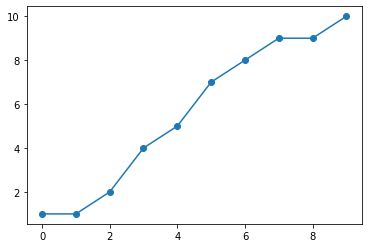

In [7]:
plt.plot(X,Y)
plt.scatter(X,Y)

## 02. Hypothesis Define

In [11]:
class H():
    
    def __init__(self, w):
        self.w = w
        
    def forward(self, x):
        return self.w * x

In [12]:
h = H(4)
pred_y = h.forward(5)
pred_y

20

In [13]:
print('value of f(5) :', pred_y)
print('value of w :', h.w)

value of f(5) : 20
value of w : 4


## 03. Cost Function Define(Loss function Define)

In [26]:
def cost(h, X, Y):
    error = 0
    for i in range(len(X)):
        error = (h.forward(X[i]) - Y[i])**2 + error
    
    error = error/len(X)
    
    return error

In [27]:
h = H(4)
print('cost value when w = 4 :', cost(h, X, Y))

cost value when w = 4 : 222.2


In [28]:
def better_cost(perd_y,true_y):
    
    error = 0
    
    for i in range(len(X)):
        error += (pred_y[i] - true_y[i])**2
    
    error = error / len(X)
    
    return error   

In [29]:
pred_y = [h.forward(X[i]) for i in range(len(X))]

In [30]:
better_cost(pred_y,Y)

222.2

### Cost Surface Visualization

In [31]:
list_w = []
list_c = []

In [33]:
for i in range(-20,20):
    w = i * 0.5
    h = H(w)
    c = cost(h,X,Y)
    
    list_w.append(w)
    list_c.append(c)

In [34]:
print(list_w)

[-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]


In [35]:
print(list_c)

[3582.2, 3269.825, 2971.7, 2687.825, 2418.2, 2162.825, 1921.7, 1694.825, 1482.2, 1283.825, 1099.7, 929.825, 774.2, 632.825, 505.7, 392.825, 294.2, 209.825, 139.7, 83.825, 42.2, 14.825, 1.7, 2.825, 18.2, 47.825, 91.7, 149.825, 222.2, 308.825, 409.7, 524.825, 654.2, 797.825, 955.7, 1127.825, 1314.2, 1514.825, 1729.7, 1958.825]


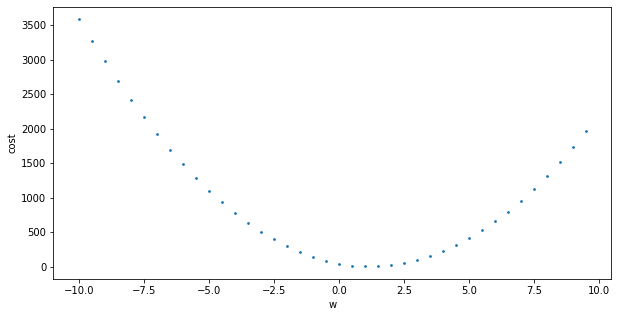

In [36]:
plt.figure(figsize=(10,5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w,list_c,s=3)

### Graient Descent Algorithm

In [37]:
# 수치해석적
def cal_grad(w, cost):
    h = H(w)
    cost1 = cost(h, X, Y)
    eps = 0.00001
    h = H(w + eps)
    cost2 = cost(h, X, Y)
    dcost = cost2 - cost1
    dw = eps
    grad = dcost / dw
    return grad, (cost1 + cost2) * 0.5

In [38]:
# 편미분 후 그레디언트 디센트
def cal_grad2(w, cost):
    h = H(w)
    grad = 0
    
    # cost 미분
    for i in range(len(X)):
        grad = 2 * (h.forward(X[i]) - Y[i]) * X[i] + grad
    
    grad = grad / len(X)
    c = cost(h, X, Y)
    
    return grad, c

#### Test

In [39]:
w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

In [41]:
for i in range(100):
    grad, mean_cost = cal_grad(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)
    
    w1 = lr * grad - w1
    w2 = lr * grad2 - w2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)
    
print(w1, mean_cost, w2, mean_cost2)

-0.48251548951479095 82.12849039207927 -0.4825174825174825 82.12916524035407


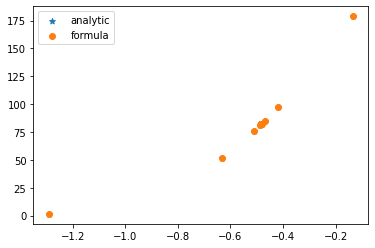

In [46]:
plt.scatter(list_w1, list_c1, label='analytic', marker = "*")
plt.scatter(list_w2, list_c2, label='formula')
plt.legend()

### 초기화 값이 다를 때 양상

In [47]:
w1 = 1.4
w2 = 1.1
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

In [48]:
for i in range(100): 
    grad, mean_cost = cal_grad2(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)

In [49]:
print(w1, mean_cost, w2, mean_cost2)

1.2105263157894737 0.43684210526315803 1.2105263157894737 0.43684210526315803


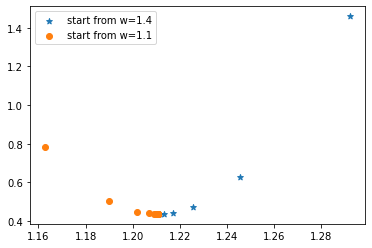

In [50]:
plt.scatter(list_w1, list_c1, label='start from w=1.4', marker='*')
plt.scatter(list_w2, list_c2, label='start from w=1.1')
plt.legend()